# Objetivo
O objetivo deste notebook é demonstrar algumas habilidades gráficas utilizando as bibliotecas Matplotlib, Seaborn e Plotly, a fim de enriquecer ainda mais o portfólio de projetos em ciência de dados, análise de dados e visualização de dados (DataViz).

# Gráfico de Barras

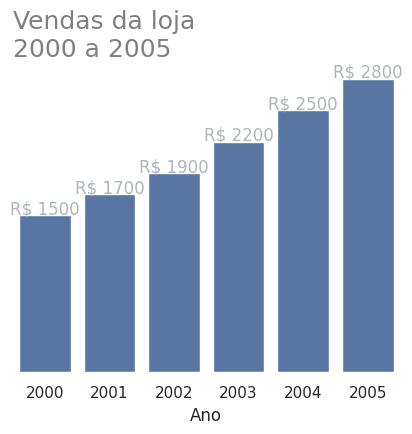

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

anos = list(range(2000, 2006))
vendas_fixas = [1500, 1700, 1900, 2200, 2500, 2800]  # Valores fixos para as vendas

df = pd.DataFrame({'Ano': anos, 'Vendas': vendas_fixas})

# Estilo do gráfico
sns.set(style="white")

# Gráfico de barras
plt.figure(figsize=(5, 4))
ax = sns.barplot(x='Ano', y='Vendas', data=df, color='b')

# Adicione valores acima das barras
for p in ax.patches:
    ax.annotate(f'R$ {int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='#adb5bd', xytext=(0, 5), textcoords='offset points')

# Personalizar
plt.title('Vendas da loja \n2000 a 2005', fontsize=18, loc='left', color='gray')
plt.xlabel('Ano')
plt.ylabel('')  # Apague o rótulo do eixo Y
plt.yticks([])  # Apague os valores do eixo Y
sns.despine(left=True, bottom=True)  # Remova a "espinha" do eixo Y

plt.show()

In [2]:
import plotly.express as px
import plotly.graph_objects as go

# Crie o gráfico de barras com Plotly
fig = go.Figure()

# Adicione as barras
fig.add_trace(go.Bar(
    x=df['Ano'],
    y=df['Vendas'],
    text=df['Vendas'],  # Adicione os valores como texto nas barras
    textposition='inside',  # Coloque o texto dentro das barras
    marker_color='blue'
))

# Personalize o layout do gráfico
fig.update_layout(
    title='Vendas da loja 2000 a 2005',  # Título do gráfico
    xaxis_title='Ano',  # Rótulo do eixo X
    yaxis_title='',  # Rótulo do eixo Y (vazio para remover)
    yaxis=dict(showticklabels=False),  # Remova os valores do eixo Y
    showlegend=False,  # Ocultar legenda
    xaxis=dict(tickvals=df['Ano'], ticktext=df['Ano']),  # Defina os rótulos do eixo X
    plot_bgcolor='white',# Cor de fundo do gráfico
    width=500,
    height=400

)
descricao = "As vendas aumentaram 12% em relação ao ano de 2005"
fig.add_annotation(
    text=descricao,
    xref='paper', yref='paper',
    x=1.5, y=-1.2,  # Posição em coordenadas relativas ao gráfico
    showarrow=False,
    font=dict(size=14)
)

fig.show()

In [3]:
# Crie o gráfico de barras com Plotly
fig = go.Figure()

# Adicione as barras
for i in range(len(df)):
    if df['Ano'][i] == 2005:
        # Destaque a barra de 2005
        fig.add_trace(go.Bar(
            x=[df['Ano'][i]],
            y=[df['Vendas'][i]],
            text=[df['Vendas'][i]],
            textposition='inside',
            marker_color='lightblue',  # Cor mais clara para 2005
            marker_line_width=0,  # Espessura da borda
            marker_line_color='blue',  # Cor da borda
            name=str(df['Ano'][i])  # Converta o ano em string
        ))
        # Adicione a anotação ao lado da barra de 2005
        anotacao = "As vendas aumentaram 12% em relação ao ano de 2005"
        fig.add_annotation(
            text=anotacao,
            x=df['Ano'][i] + 0,
            y=df['Vendas'][i],
            showarrow=True,
            font=dict(size=14)
        )
    else:
        fig.add_trace(go.Bar(
            x=[df['Ano'][i]],
            y=[df['Vendas'][i]],
            text=[df['Vendas'][i]],
            textposition='inside',
            marker_color='blue',
            name=str(df['Ano'][i])
        ))

# layout do gráfico
fig.update_layout(
    title='Vendas da loja 2000 a 2005',  # Título do gráfico
    xaxis_title='Ano',  # Rótulo do eixo X
    yaxis_title='',  # Rótulo do eixo Y (vazio para remover)
    yaxis=dict(showticklabels=False),  # Remova os valores do eixo Y
    showlegend=False,  # Ocultar legenda
    xaxis=dict(tickvals=df['Ano'], ticktext=df['Ano']),  # Defina os rótulos do eixo X
    plot_bgcolor='white'  # Cor de fundo do gráfico
)

fig.show()

# Barras

In [4]:
# Dados dos produtos e vendas
data = {
    'Produto': ['Pneu', 'Açúcar', 'Bolacha', 'Sal', 'Pudim'],
    'Vendas_2015': [50000, 75000, 60000, 90000, 40000]
}

# Criando o DataFrame
df = pd.DataFrame(data)

df

,Produto,Vendas_2015
0,Pneu,50000
1,Açúcar,75000
2,Bolacha,60000
3,Sal,90000
4,Pudim,40000


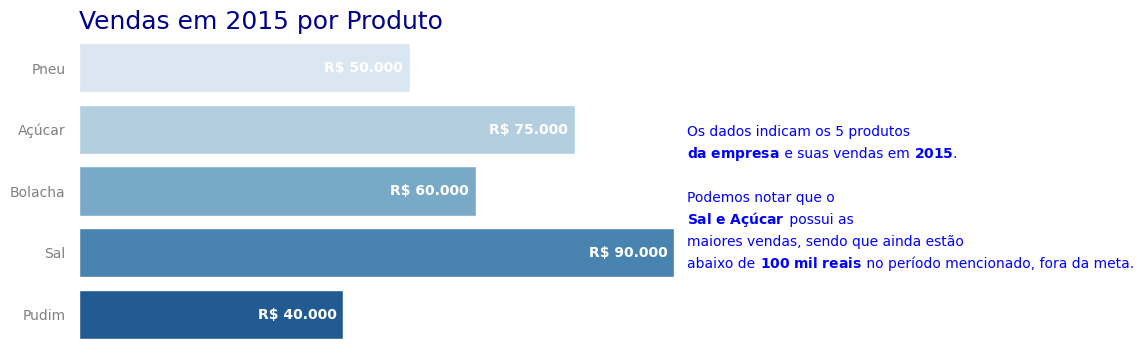

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.75)
sns.set_theme(style='white')

ax = sns.barplot(df, x='Vendas_2015', y='Produto', palette='Blues')
# Personalizando o gráfico
ax.set_title('Vendas em 2015 por Produto', fontsize=18, color='darkblue', loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = 'gray')
sns.despine(left = True, bottom = True)

  # Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(df['Vendas_2015']):
    qtd = f'R$ {valor:,.0f}'.replace(',','.')
    offset = 1e3  # offset de 1.000
    ax.text(valor - offset, i, qtd, color= 'white', fontsize=10, fontweight='bold', ha='right', va='center')

from matplotlib import transforms
def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

# Anotando uma conclusão no gráfico
texto_colorido(
    9.2e4, 3.25,                                                        # coordenadas
    'Os dados indicam os 5 produtos \n'                    # texto
    '$\\bf{da \ empresa}$|| e suas vendas em ||$\\bf{2015}$.\n'
    '\n'
    'Podemos notar que o \n'
    '$\\bf{Sal\ e\ Açúcar}$|| possui as \n'
    'maiores vendas, sendo que ainda estão\n'
    'abaixo de ||$\\bf{100\ mil\ reais}$|| no período mencionado, fora da meta.',
    [['blue'],                        # linha 1                          # cores
     ['blue', 'blue', 'blue'],         # linha 2
     ['blue'],                        # linha 3
     ['blue'],                        # linha 4
     ['blue', 'blue'],                # linha 5
     ['blue'],                        # linha 5
     ['blue', 'blue', 'blue']        # linha 7
    ],
    esp=22, # espaçamento
    ax=ax, # figura onde desenhar o texto
    fontsize=10)

In [6]:
import numpy as np
# Criando um DataFrame para as cores da escala
num_colors = len(df)
colors = [f'rgb({r}, {g}, {b})' for r, g, b in zip(np.linspace(0, 100, num_colors),
                                                   np.linspace(100, 200, num_colors),
                                                   np.linspace(150, 255, num_colors))]

# Criando o gráfico de barras com Plotly
fig = go.Figure(data=[
    go.Bar(
        x=df['Vendas_2015'],
        y=df['Produto'],
        orientation='h',
        marker=dict(color=colors),
        text=[f'R$ {valor:,.0f}'.replace(',', '.') for valor in df['Vendas_2015']],
        textposition='inside'
    )
])

# Layout do gráfico
fig.update_layout(
    title='Vendas em 2015 por Produto',
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(ticks='', showticklabels=False),
    #yaxis=dict(tickfont=dict(size=10, color='blue')),
    showlegend=False,
    margin=dict(l=0, r=0, b=0, t=30),
    plot_bgcolor='white'
)
fig.show()

In [7]:
# Dados dos produtos e vendas
data = {
    'Produto': ['Pneu', 'Açúcar', 'Bolacha', 'Sal', 'Pudim'],
}

df = pd.DataFrame(data)

# Acrescentando colunas de vendas por regiões
df['Sudeste'] = [30000, 45000, 35000, 55000, 25000]
df['Centro_Oeste'] = [10000, 15000, 12000, 18000, 8000]
df['Norte'] = [7000, 10500, 8400, 12600, 5600]
df['Sul'] = [20000, 30000, 24000, 36000, 16000]
df['Nordeste'] = [15000, 22500, 18000, 27000, 12000]

# Adicionando a coluna "Ano"
df['Ano'] = [2013, 2014, 2015, 2016, 2017]

anos = [2013, 2014, 2015, 2016, 2017]
regioes = ['Sudeste', 'Centro_Oeste', 'Norte', 'Sul', 'Nordeste']

vendas_por_ano_regiao = []
for ano in anos:
    for regiao in regioes:
        valor = random.randint(0,10000)*10
        vendas_por_ano_regiao.append([ano, regiao, valor])

# Criando um DataFrame para as vendas por ano e por região
df_vendas = pd.DataFrame(vendas_por_ano_regiao, columns=['Ano', 'Regiao', 'Vendas'])

df_vendas

,Ano,Regiao,Vendas
0,2013,Sudeste,67750
1,2013,Centro_Oeste,38910
2,2013,Norte,23490
3,2013,Sul,41800
4,2013,Nordeste,94870
5,2014,Sudeste,14990
6,2014,Centro_Oeste,61250
7,2014,Norte,50810
8,2014,Sul,81670
9,2014,Nordeste,73250


# Agregado

In [8]:
# Criando uma tabela cruzada (crosstab) com os valores de venda de cada ano por região
vendas_reg = pd.crosstab(index = df_vendas['Ano'], columns= df_vendas['Regiao'], values = df_vendas['Vendas'], aggfunc='sum')

# Ajustando a tabela em ordem descrescente dos estados que mais executam vendas
vendas_reg = vendas_reg[["Sudeste", "Nordeste", "Centro_Oeste", "Norte", "Sul"]]
vendas_reg

Regiao,Sudeste,Nordeste,Centro_Oeste,Norte,Sul
Ano,,,,,
2013,67750,94870,38910,23490,41800
2014,14990,73250,61250,50810,81670
2015,21500,28270,48480,98660,82320
2016,96130,6800,5440,45320,66710
2017,49920,76350,82170,21480,57870


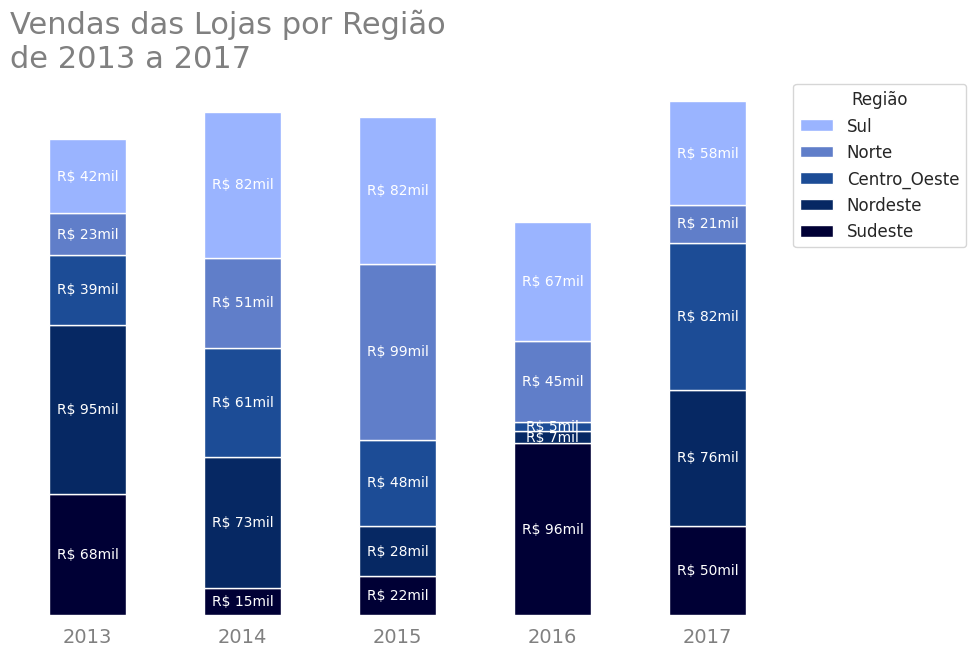

In [9]:
cores=['#000035','#062863','#1c4c96','#607ec9','#9ab4ff']
ax = vendas_reg.plot(kind='bar', stacked=True, figsize=(10,7),color=cores)
# Personalizando o gráfico
ax.set_title('Vendas das Lojas por Região\nde 2013 a 2017', loc='left', fontsize=22, color = 'gray')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = 'gray', rotation = 0)
ax.set_frame_on(False)

# Personalizando a legenda
ax.legend(bbox_to_anchor=(1,1), reverse=True, title='Região', title_fontsize= 12, fontsize= 12)

# Adicionando os valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.0f}mil'.replace(',','.') for valor in container]
  ax.bar_label(container,  label_type='center', labels= labels, size=10, color='white')

# Linhas

In [10]:
df

,Produto,Sudeste,Centro_Oeste,Norte,Sul,Nordeste,Ano
0,Pneu,30000,10000,7000,20000,15000,2013
1,Açúcar,45000,15000,10500,30000,22500,2014
2,Bolacha,35000,12000,8400,24000,18000,2015
3,Sal,55000,18000,12600,36000,27000,2016
4,Pudim,25000,8000,5600,16000,12000,2017


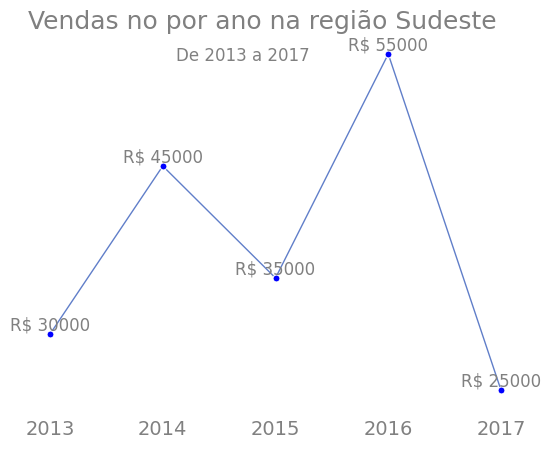

In [11]:
ax = sns.lineplot(df, x='Ano', y='Sudeste', lw=1, color='#607ec9', marker='.', markersize=10, markerfacecolor='blue',)

ax.set_title('Vendas no por ano na região Sudeste', fontsize = 18, color = 'gray', loc='left')
ax.text(0.3, 0.95, "De 2013 a 2017", transform=ax.transAxes, color= 'gray', fontsize=12, ha='left', va='center')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.set_frame_on(False)
ax.xaxis.set_tick_params(labelsize=14, labelcolor = 'gray')

for x, y in zip(df['Ano'], df['Sudeste']):
    ax.text(x, y, f'R$ {y}', ha='center', va='bottom', fontsize=12, color = 'gray')

In [12]:
# Criar um gráfico de linha com o Plotly
fig = px.line(df, x='Ano', y='Sudeste', markers=True)

# Personalizar o gráfico
fig.update_layout(
    title='Vendas por ano na região Sudeste',
    title_font_size=18,
    title_font_color='gray',
    title_x=0,
    xaxis_title='',
    yaxis_title='',
    xaxis_tickfont_size=14,
    xaxis_tickfont_color='gray',
    yaxis_tickfont_size=14,
    yaxis_tickfont_color='gray',
    showlegend=False,
    plot_bgcolor='white',
    width=500,
    height=400
)

fig.update_yaxes(showticklabels=False, showgrid=False,)

# Configurar o eixo X para mostrar somente os valores presentes na tabela
fig.update_xaxes(tickvals=df['Ano'], ticktext=df['Ano'])

# Adicionar os valores aos pontos
for i, row in df.iterrows():
    fig.add_trace(go.Scatter(x=[row['Ano']], y=[row['Sudeste']], text=[f'R$ {row["Sudeste"]:.0f}'],
                             textposition='top center', mode='text', showlegend=False))

# Dados ao passar o mouse
fig.update_layout(hovermode="closest")    # para exibir apenas do dado que passamos o mouse

fig.show()

# Densidade( Histograma)

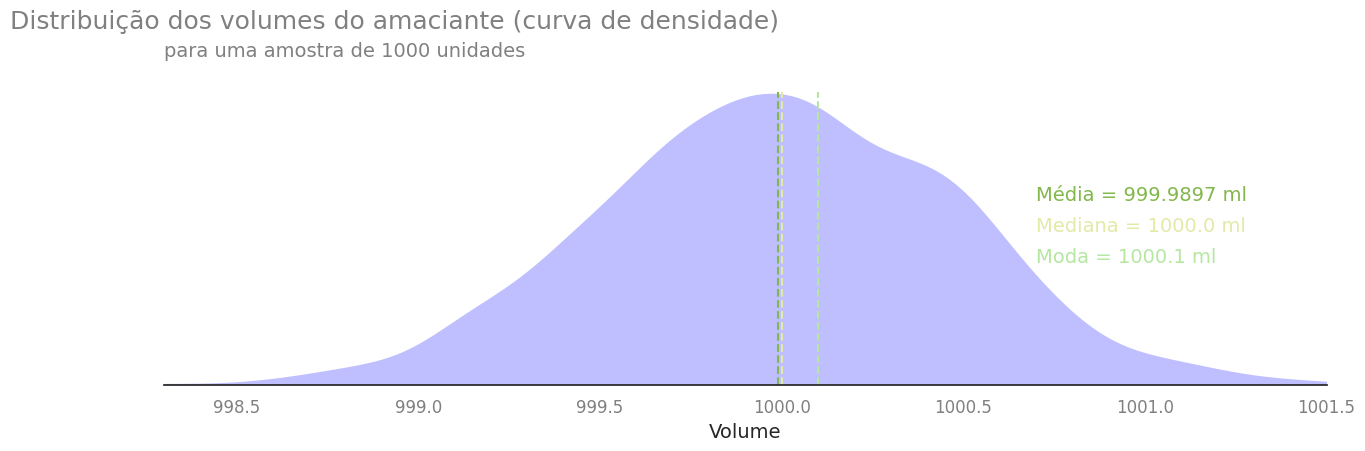

In [13]:
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(15,4))
sns.set_theme(style="white")

# Gerando a curva de densidade
ax = sns.kdeplot(data=vol_amaciante, x='Volume', color='blue', lw=0, fill=True)

# # Personalizando o gráfico
plt.suptitle('Distribuição dos volumes do amaciante (curva de densidade)', size=18, color='gray', ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color='gray', pad = 15, loc = "left")
ax.set_xlabel('Volume', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
ax.yaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
ax.set_xlim(vol_amaciante.Volume.min(), vol_amaciante.Volume.max())
sns.despine(left = True, top = True)
# Personalizando o gráfico
ax.set_ylabel('')
ax.set_yticklabels([])
# Gerando as linhas de média, mediana e moda
estat = vol_amaciante.Volume.mean(), vol_amaciante.Volume.median(), vol_amaciante.Volume.mode()[0]
desc = ['Média', 'Mediana', 'Moda']

# Definindo as cores de cada estatística descritiva
cores = ['#82b74b', '#e3eaa7', '#b5e7a0']

# gerando 1 ou mais linhas na vertical a partir de um valor de x
ax.vlines(x=estat, ymin=0, ymax=0.8, colors=cores, linestyles='--')

# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
  ax.text(0.75, (0.6 - i/10), f'{desc[i]} = {estat[i]} ml', fontsize=14, color = cores[i], transform=ax.transAxes)
ax=ax

In [14]:
# Criar um histograma de densidade com o Plotly
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=vol_amaciante['Volume'],
    nbinsx=15,
    histnorm='probability',
    marker_color='blue',
    opacity=0.6
))

# Personalizar o gráfico
fig.update_layout(
    title_text='Distribuição dos volumes do amaciante (histograma de densidade)',
    title_font_size=18,
    xaxis_title='Volume',
    yaxis_title='Densidade',
    xaxis=dict(
        tickfont=dict(size=12, color='gray')
    ),
    yaxis=dict(
        tickfont=dict(size=12, color='gray')
    ),
    showlegend=False,
    bargap=0.05,
    plot_bgcolor='white',
    xaxis_range=[vol_amaciante['Volume'].min(), vol_amaciante['Volume'].max()]
)

# Gerando as linhas de média, mediana e moda
estat = vol_amaciante['Volume'].mean(), vol_amaciante['Volume'].median(), vol_amaciante['Volume'].mode()[0]
desc = ['Média', 'Mediana', 'Moda']

# Definindo as cores de cada estatística descritiva
cores = ['#82b74b', '#e3eaa7', '#b5e7a0']

# Gerando as linhas verticais
for i in range(len(estat)):
    fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=estat[i],
            x1=estat[i],
            y0=0,
            y1=0.8,
            line=dict(
                color=cores[i],
                dash='dash'
            )
        )
    )

# Anotando os valores de média, mediana e moda no gráfico
for i in range(len(estat)):
    fig.add_annotation(
        text=f'{desc[i]} = {estat[i]} ml',
        xref="paper",
        yref="paper",
        x=0.75,
        y=(0.6 - i / 10),
        font=dict(size=14, color=cores[i]),
        showarrow=False
    )

fig.update_yaxes(visible=False, showticklabels=False)

fig.show()

# Boxplot

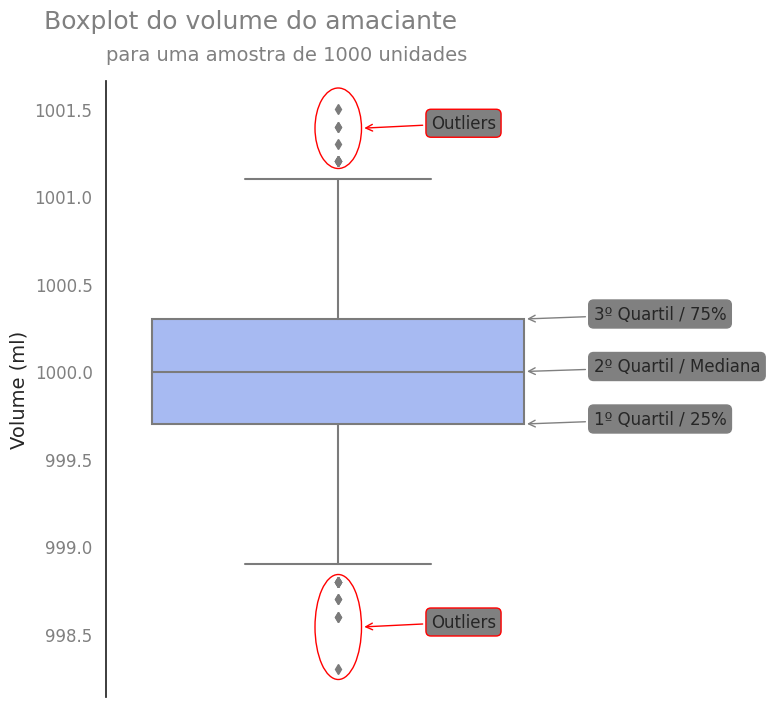

In [15]:
from matplotlib.patches import Ellipse
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax= sns.boxplot(data=vol_amaciante, y='Volume', orient='v', color='#9ab4ff')

# Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color='gray', ha = 'right', x = 0.71, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color='gray', pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
sns.despine(bottom=True)

# Gerando outros elementos visuais (elipses dos outliers)
y_min, y_max = ax.get_ybound()
outlier_sup = Ellipse((0, y_max - 0.27), width = 0.1, height = 0.46, color='red', fill=False)
outlier_inf = Ellipse((0, y_min + 0.4), width = 0.1, height = 0.6, color='red', fill=False)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)

# Adicionando a explicação dos elementos de um boxplot
ax.annotate("Outliers", xy=(0 + 0.05, y_max - 0.27), xycoords='data',    # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc='gray', ec='red'),         # caixa de texto
            xytext=(50, 0), textcoords='offset points',                   # posição do texto
            arrowprops=dict(arrowstyle="->", color='red'))            # propriedades da seta

ax.annotate("Outliers", xy=(0 + 0.05, y_min + 0.4), xycoords='data',
            bbox=dict(boxstyle="round", fc='gray', ec='red'),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='red'))

ax.annotate("1º Quartil / 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords='data',
            bbox=dict(boxstyle="round", fc='gray', ec='gray'),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='gray'))

ax.annotate("2º Quartil / Mediana", xy=(0.4, vol_amaciante.median()), xycoords='data',
            bbox=dict(boxstyle="round", fc='gray', ec='gray'),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='gray'))

ax.annotate("3º Quartil / 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords='data',
            bbox=dict(boxstyle="round", fc='gray', ec='gray'),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='gray'))

plt.show()

In [16]:
# Criar um gráfico de boxplot com o Plotly
fig = go.Figure()

fig.add_trace(go.Box(
    y=vol_amaciante['Volume'],
    boxpoints='outliers',  # Mostrar outliers
    marker_color='#9ab4ff',
))

# Personalizar o gráfico
fig.update_layout(
    title_text='Boxplot do volume do amaciante',
    title_font_size=18,
    xaxis_title='',
    yaxis_title='Volume (ml)',
    xaxis=dict(
        showticklabels=False
    ),
    yaxis=dict(
        tickfont=dict(size=12, color='gray')
    ),
    showlegend=False,
    plot_bgcolor='white',
)

# Adicionando as elipses dos outliers
outlier_sup = dict(
    x=0,
    y=vol_amaciante['Volume'].max() - 0.27,
    xref='paper',
    yref='y',
    xanchor='right',
    yanchor='middle',
    xshift=5,
    yshift=0,
    text='Outliers',
    font=dict(color='red'),
    showarrow=True,
    arrowhead=1,
    ax=-30,
    ay=0,
    arrowcolor='red',
    arrowwidth=2,
)

outlier_inf = dict(
    x=0,
    y=vol_amaciante['Volume'].min() + 0.4,
    xref='paper',
    yref='y',
    xanchor='right',
    yanchor='middle',
    xshift=5,
    yshift=0,
    text='Outliers',
    font=dict(color='red'),
    showarrow=True,
    arrowhead=1,
    ax=-30,
    ay=0,
    arrowcolor='red',
    arrowwidth=2,
)

fig.add_annotation(**outlier_sup)
fig.add_annotation(**outlier_inf)

# Adicionando as anotações dos quartis
for quartil, pos_y in [(0.25, vol_amaciante['Volume'].quantile(0.25)), (0.5, vol_amaciante['Volume'].median()), (0.75, vol_amaciante['Volume'].quantile(0.75))]:
    annotation = dict(
        x=0.4,
        y=pos_y,
        xref='paper',
        yref='y',
        xanchor='right',
        yanchor='middle',
        xshift=-105,
        yshift=0,
        text=f"{int(quartil * 100)}º Quartil",
        font=dict(color='gray'),
        showarrow=True,
        arrowhead=1,
        ax=-130,
        ay=0,
        arrowcolor='gray',
        arrowwidth=2,
    )
    fig.add_annotation(**annotation)

fig.show()


# Mapa de calor (Heatmap)

In [17]:
# DataFrame fictício
data = {'Temperatura': [random.randint(1, 10) for _ in range(10)],
        'Pressão': [random.randint(1, 10) for _ in range(10)],
        'Nível': [random.randint(1, 10) for _ in range(10)],
        'Densidade': [random.randint(1, 10) for _ in range(10)]}

df = pd.DataFrame(data)
df

,Temperatura,Pressão,Nível,Densidade
0,10,9,7,10
1,7,3,6,2
2,6,1,8,3
3,7,4,5,2
4,8,7,6,6
5,1,6,3,8
6,1,10,8,2
7,7,6,7,7
8,9,7,2,4
9,3,6,5,9


In [18]:
df.corr()

,Temperatura,Pressão,Nível,Densidade
Temperatura,1.000000,-0.105458,-0.005237,0.037302
Pressão,-0.105458,1.000000,-0.026858,0.378584
Nível,-0.005237,-0.026858,1.000000,-0.145288
Densidade,0.037302,0.378584,-0.145288,1.000000


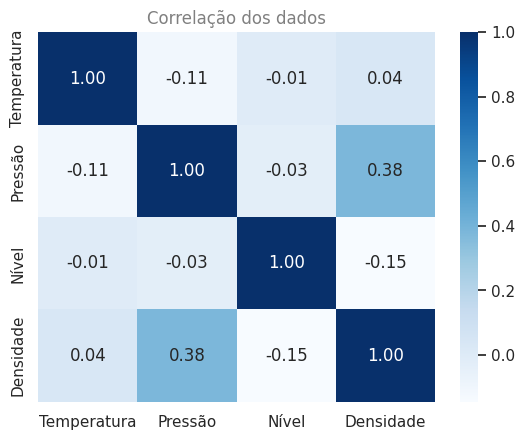

In [19]:
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap='Blues')
ax.set_title('Correlação dos dados', color = 'gray')
ax=ax

In [20]:
fig = px.imshow(round(df.corr(),2), color_continuous_scale='Blues', title='Heatmap dos dados',text_auto=True,
                width=600, height=600)
fig.show()

# Violin Plot

In [21]:
# DataFrame fictício
np.random.seed(42)
data = {
    'Comprimento': np.random.normal(50, 10, 200),
}

df = pd.DataFrame(data)
df = round(df,2)
df

,Comprimento
0,54.97
1,48.62
2,56.48
3,65.23
4,47.66
...,...
195,53.85
196,41.16
197,51.54
198,50.58


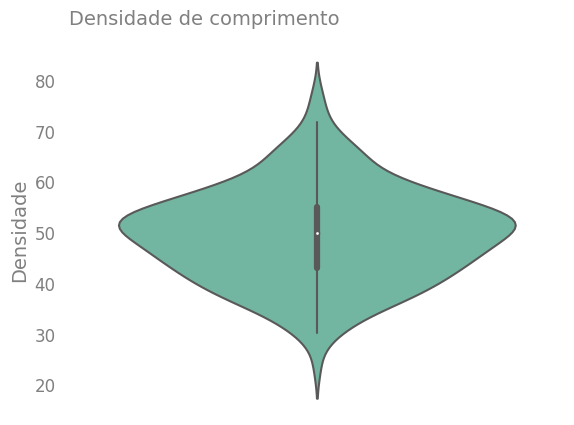

In [22]:
ax = sns.violinplot(data=df, y='Comprimento', palette='Set2')
ax.set_title('Densidade de comprimento', fontsize=14, color='gray', pad = 15, loc = "left")
ax.set_xlabel('', fontsize = 14)
ax.set_ylabel('Densidade', fontsize = 14, color='gray')
ax.xaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
ax.yaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
sns.despine(left = True, top = True, bottom=True)

In [23]:
# Criar o gráfico de violin com Plotly
fig = px.violin(df, y='Comprimento', box=True, points="all", title='Densidade de Comprimento')
fig.update_layout(title_font=dict(size=14, color='gray'), xaxis_title='', yaxis_title='Densidade', font=dict(size=12, color='gray'))
fig.update_xaxes(tickfont=dict(size=12, color='gray'))
fig.update_yaxes(tickfont=dict(size=12, color='gray'))
fig.update_yaxes(showgrid=False)
fig.show()

# Dispersão

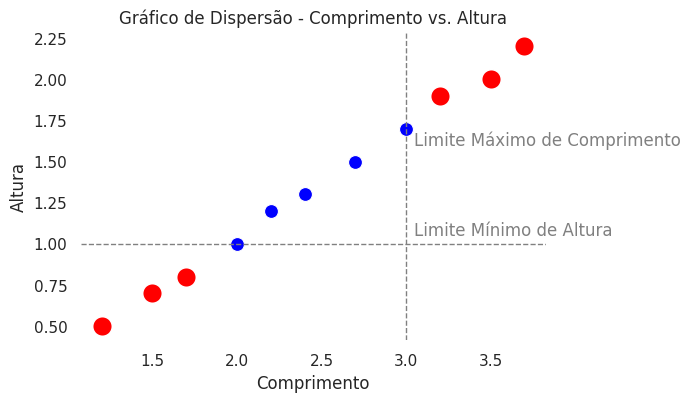

In [24]:
sns.set_theme(style='white')
# Dados fictícios para comprimento e altura
comprimento = [1.2, 1.5, 1.7, 2.0, 2.2, 2.4, 2.7, 3.0, 3.2, 3.5, 3.7]
altura = [0.5, 0.7, 0.8, 1.0, 1.2, 1.3, 1.5, 1.7, 1.9, 2.0, 2.2]

# Definir limites mínimos e máximos
limite_min_altura = 1.0
limite_max_comprimento = 3.0

# DataFrame com os dados
dados = {'Comprimento': comprimento, 'Altura': altura}
df = pd.DataFrame(dados)

# Plotar o gráfico de dispersão com marcadores
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Comprimento', y='Altura', data=df, color='blue', marker='o', s=100)

# Adicionar círculos para destacar os rejeitos
rejeitos = df[(df['Comprimento'] > limite_max_comprimento) | (df['Altura'] < limite_min_altura)]
sns.scatterplot(x='Comprimento', y='Altura', data=rejeitos, color='red', marker='o', s=200)

# Adicionar limites pontilhados
plt.axhline(y=limite_min_altura, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=limite_max_comprimento, color='gray', linestyle='--', linewidth=1)

# Adicionar descrição às linhas de corte
plt.annotate('Limite Mínimo de Altura', xy=(3.05, 1.05), color='gray')
plt.annotate('Limite Máximo de Comprimento', xy=(3.05, 1.6), color='gray')

# Adicionar título e rótulos dos eixos
plt.title('Gráfico de Dispersão - Comprimento vs. Altura')
plt.xlabel('Comprimento')
plt.ylabel('Altura')

# Remover as linhas de grade
sns.despine(bottom=True, left=True)

# Mostrar o gráfico
plt.show()

In [25]:
# Filtrar os dados que estão fora dos limites
rejeitos = df[(df['Comprimento'] > limite_max_comprimento) | (df['Altura'] < limite_min_altura)]

# Criar o gráfico com Plotly
fig = px.scatter(df, x='Comprimento', y='Altura', title='Gráfico de Dispersão - Comprimento vs. Altura',
                 labels={'Comprimento': 'Comprimento', 'Altura': 'Altura'},
                 hover_name=None, hover_data=None)

# Alterar o fundo para branco
fig.update_layout(plot_bgcolor='white')

# Adicionar círculos para destacar os rejeitos
fig.add_trace(px.scatter(rejeitos, x='Comprimento', y='Altura', color_discrete_sequence=['red']).data[0])

# Adicionar limites pontilhados
fig.add_shape(type='line', x0=limite_max_comprimento, y0=df['Altura'].min(),
              x1=limite_max_comprimento, y1=df['Altura'].max(),
              line=dict(color='gray', dash='dash'))

fig.add_shape(type='line', x0=df['Comprimento'].min(), y0=limite_min_altura,
              x1=df['Comprimento'].max(), y1=limite_min_altura,
              line=dict(color='gray', dash='dash'))

# Adicionar descrição às linhas de corte
fig.add_annotation(text='Limite Mínimo de Altura', x=limite_max_comprimento + 0.5, y=limite_min_altura + 0.05, showarrow=False,
                   font=dict(color='gray'))

fig.add_annotation(text='Limite Máximo de Comprimento', x=limite_max_comprimento + 0.1, y=1.6, showarrow=False,
                   font=dict(color='gray'))

fig.show()

# Gráfico de Área

In [26]:
# Criar uma lista de meses
meses = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

# Criar dados fictícios de vendas mensais
vendas_mensais = [random.randint(1000, 5000) for _ in range(12)]

# Criar um DataFrame
data = {"Mês": meses, "Vendas": vendas_mensais}
df = pd.DataFrame(data)

df

,Mês,Vendas
0,Jan,2116
1,Fev,4130
2,Mar,2586
3,Abr,1252
4,Mai,2858
5,Jun,2999
6,Jul,4032
7,Ago,4011
8,Set,4960
9,Out,3563


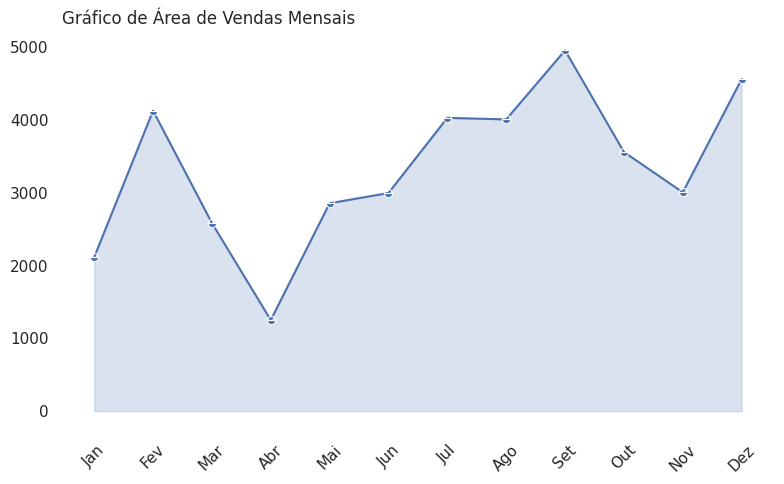

In [27]:
# Criar um gráfico de área usando Seaborn
plt.figure(figsize=(8, 5))
sns.set(style="white")
sns.lineplot(x="Mês", y="Vendas", data=df, marker="o", linestyle="-", color="b", fillstyle="bottom")

# Preencher a área sob a linha
plt.fill_between(df["Mês"], df["Vendas"], color="b", alpha=0.2)

# Personalizar o gráfico
plt.title("Gráfico de Área de Vendas Mensais", loc='left')
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=45)

ax.xaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
ax.yaxis.set_tick_params(labelsize=12, labelcolor = 'gray')
sns.despine(left = True, top = True, bottom=True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [28]:
# Criar um gráfico de área usando Plotly
fig = px.area(df, x="Mês", y="Vendas", title="Gráfico de Área de Vendas Mensais", template="plotly_white")

# Personalizar o gráfico
fig.update_traces(marker=dict(size=10, line=dict(width=2, color='blue')), line_shape='linear', line=dict(color='blue'))
fig.update_layout(xaxis_title="", yaxis_title="", xaxis=dict(tickfont=dict(size=12, color='gray')), yaxis=dict(tickfont=dict(size=12, color='gray')))
fig.update_xaxes(tickangle=45)
fig.update_layout(showlegend=False)

fig.show()

# Gráfico 3D

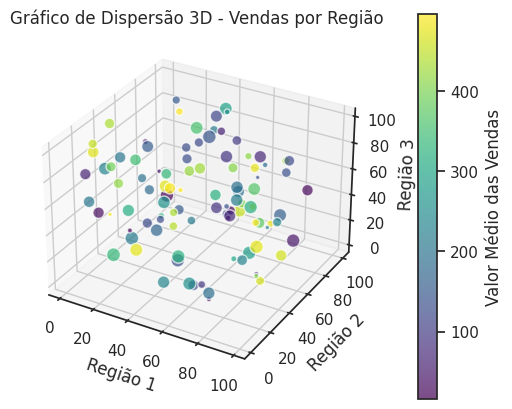

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gerar dados fictícios
np.random.seed(0)
n = 100
X = np.random.rand(n) * 100
Y = np.random.rand(n) * 100
Z = np.random.rand(n) * 100
quantidade_vendas = np.random.randint(10, 100, n)
valor_medio_vendas = np.random.uniform(10, 500, n)

# Criar um DataFrame com os dados
data = {
    'X': X,
    'Y': Y,
    'Z': Z,
    'QuantidadeVendas': quantidade_vendas,
    'ValorMedioVendas': valor_medio_vendas
}
df = pd.DataFrame(data)

# Criar uma figura 3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

# Gráfico de dispersão 3D
scatter = ax.scatter(X, Y, Z, c=valor_medio_vendas, cmap='viridis', s=quantidade_vendas, alpha=0.7, edgecolors='w')

# Adicionar rótulos aos eixos
ax.set_xlabel('Região 1')
ax.set_ylabel('Região 2')
ax.set_zlabel('Região 3')

# Adicionar uma barra de cores
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Valor Médio das Vendas')

ax.set_title('Gráfico de Dispersão 3D - Vendas por Região')

plt.show()

In [30]:
# Criar um gráfico de dispersão 3D usando Plotly
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='ValorMedioVendas', size='QuantidadeVendas',
                     opacity=0.7, color_continuous_scale='viridis', title='Gráfico de Dispersão 3D - Vendas por Região')

# Personalizar rótulos dos eixos
fig.update_layout(scene=dict(xaxis_title='Região 1', yaxis_title='Região 2', zaxis_title='Região 3'))

fig.show()

# Gráfico de Radar

In [32]:
# Dados fictícios de habilidades do jogador de futebol
categorias = ['Velocidade', 'Habilidade', 'Precisão de Chute', 'Defesa', 'Força']
pontuacoes = [85, 92, 88, 75, 80]  # Pontuações de 0 a 100 (quanto maior, melhor)
# Gráfico de radar
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=pontuacoes,
      theta=categorias,
      fill='toself',
      name='Jogador de Futebol'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 100]
    )),
  showlegend=False
)

fig.update_layout(
    title='Habilidades do Jogador de Futebol',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 100]
        )
    )
)

fig.show()

# Gráfico de Sankey

In [33]:
import plotly.graph_objects as go

# Definir os nós do gráfico de Sankey
labels = ['Página Inicial', 'Produtos Visualizados', 'Carrinho de Compras', 'Finalização da Compra']

# Definir as conexões entre os nós
source_indices = [0, 0, 1, 2, 2, 3]
target_indices = [1, 2, 2, 3, 2, 0]
values = [100, 60, 30, 20, 10, 10]

# Criar o gráfico de Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
))

# Personalizar o título do gráfico
fig.update_layout(
    title_text="Fluxo de Clientes em um Site de Comércio Eletrônico",
    font_size=10
)

# Mostrar o gráfico
fig.show()

# Mapas

In [36]:
import geopandas as gpd

# Carregar o arquivo GeoJSON original
gdf = gpd.read_file("https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-52-mun.json")

# Filtrar o município de Rio Verde
rio_verde = gdf[gdf["name"] == "Rio Verde"]

# Salvar o município de Rio Verde em um novo arquivo GeoJSON
rio_verde.to_file("rio_verde.geojson", driver="GeoJSON")

In [37]:
import geopandas as gpd
import plotly.express as px

# Carregar o arquivo GeoJSON do município de Rio Verde
rio_verde = gpd.read_file("rio_verde.geojson")

fig = px.choropleth(
    rio_verde,
    geojson=rio_verde.geometry,
    locations=rio_verde.index,
    title="Município de Rio Verde",
    projection="mercator"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})

fig.show()